<a href="https://colab.research.google.com/github/vasantha19/basic-eda/blob/main/ADS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT NECCESSARY PACKAGES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**IMPORT NECESSARY DATASETS**

In [4]:
a=pd.read_csv("ppp_data_dict.csv")
b=pd.read_csv("ppp_fraud_cases.csv")
c=pd.read_csv("ppp_over_150k.csv")
a.head()
b.head()
c.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,TOTAL_PROCEED,PROCEED_Diff,UTILITIES_PROCEED_pct,PAYROLL_PROCEED_pct,MORTGAGE_INTEREST_PROCEED_pct,RENT_PROCEED_pct,REFINANCE_EIDL_PROCEED_pct,HEALTH_CARE_PROCEED_pct,DEBT_INTEREST_PROCEED_pct,PROCEED_Per_Job
0,9547507704,2020-05-01,464,PPP,sumter coatings inc,2410 highway 15 south,sumter,UNK,29150-9662,2020-12-18,...,769358.78,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12409.01
1,9777677704,2020-05-01,464,PPP,pleasant places inc,7684 southrail road,north charleston,UNK,29420-9000,2021-09-28,...,736927.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10094.90
2,5791407702,2020-05-01,1013,PPP,boyer childrens clinic,1850 boyer ave e,seattle,UNK,98112-2922,2021-03-17,...,691355.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9218.07
3,6223567700,2020-05-01,920,PPP,kirtley construction inc,1661 martin ranch rd,san bernardino,UNK,92407-1740,2021-10-16,...,499871.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23803.38
4,9662437702,2020-05-01,101,PPP,aero box llc,unknown,unknown,UNK,0,2021-08-17,...,367437.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14697.48


**KNOWING THE DIMENSIONS**

In [13]:
print(a.shape)
print(b.shape)
print(c.shape)

(66, 2)
(100, 4)
(12874, 66)


**KNOWING THE FEATURES IN a,b,c**

In [14]:
print("Number of features in a:",len(a.keys()))
print("Number of features in b:",len(b.keys()))
print("Number of features in c:",len(c.keys()))

Number of features in a: 2
Number of features in b: 4
Number of features in c: 66


In [16]:
c.BorrowerState.value_counts()

AL     10198
AK      2663
UNK       13
Name: BorrowerState, dtype: int64

**DATA SOURCING**

In [5]:
a.info()
b.info()
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Field Name         66 non-null     object
 1   Field Description  66 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   100 non-null    object
 1   State     100 non-null    object
 2   Source    100 non-null    object
 3   Suspects  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LoanNumber                     12874 non-null  int64  
 1   DateA

**REPLACING STRING BY NUMBERS**

In [19]:
c.isnull().sum()

LoanNumber                    0
DateApproved                  0
SBAOfficeCode                 0
ProcessingMethod              0
BorrowerName                  0
                             ..
RENT_PROCEED_pct              1
REFINANCE_EIDL_PROCEED_pct    1
HEALTH_CARE_PROCEED_pct       1
DEBT_INTEREST_PROCEED_pct     1
PROCEED_Per_Job               1
Length: 66, dtype: int64

**DATA CLEANING**

In [33]:
c.isna().any()

LoanNumber                    False
DateApproved                  False
SBAOfficeCode                 False
ProcessingMethod              False
BorrowerName                  False
                              ...  
RENT_PROCEED_pct               True
REFINANCE_EIDL_PROCEED_pct     True
HEALTH_CARE_PROCEED_pct        True
DEBT_INTEREST_PROCEED_pct      True
PROCEED_Per_Job                True
Length: 66, dtype: bool

In [24]:
c.columns[c.isnull().any()].tolist()

['UndisbursedAmount',
 'FranchiseName',
 'ServicingLenderLocationID',
 'ServicingLenderName',
 'ServicingLenderAddress',
 'ServicingLenderCity',
 'ServicingLenderState',
 'ServicingLenderZip',
 'RuralUrbanIndicator',
 'HubzoneIndicator',
 'LMIIndicator',
 'BusinessAgeDescription',
 'ProjectCity',
 'ProjectCountyName',
 'ProjectState',
 'ProjectZip',
 'CD',
 'JobsReported',
 'NAICSCode',
 'Race',
 'Ethnicity',
 'UTILITIES_PROCEED',
 'PAYROLL_PROCEED',
 'MORTGAGE_INTEREST_PROCEED',
 'RENT_PROCEED',
 'REFINANCE_EIDL_PROCEED',
 'HEALTH_CARE_PROCEED',
 'DEBT_INTEREST_PROCEED',
 'BusinessType',
 'OriginatingLenderLocationID',
 'OriginatingLender',
 'OriginatingLenderCity',
 'OriginatingLenderState',
 'Gender',
 'Veteran',
 'NonProfit',
 'ForgivenessAmount',
 'ForgivenessDate',
 'ApprovalDiff',
 'NotForgivenAmount',
 'ForgivenPercentage',
 'TOTAL_PROCEED',
 'PROCEED_Diff',
 'UTILITIES_PROCEED_pct',
 'PAYROLL_PROCEED_pct',
 'MORTGAGE_INTEREST_PROCEED_pct',
 'RENT_PROCEED_pct',
 'REFINANCE_EIDL

In [6]:
a.describe()
b.describe()
c.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,...,TOTAL_PROCEED,PROCEED_Diff,UTILITIES_PROCEED_pct,PAYROLL_PROCEED_pct,MORTGAGE_INTEREST_PROCEED_pct,RENT_PROCEED_pct,REFINANCE_EIDL_PROCEED_pct,HEALTH_CARE_PROCEED_pct,DEBT_INTEREST_PROCEED_pct,PROCEED_Per_Job
count,1.287400e+04,12874.000000,12874.000000,12874.0,1.287400e+04,1.287400e+04,12873.0,12873.000000,12873.000000,12873.000000,...,1.287300e+04,1.287300e+04,12873.000000,12873.000000,12873.000000,12873.000000,12873.000000,12873.000000,12873.000000,12873.000000
mean,5.554688e+09,588.138185,35.114417,100.0,5.290098e+05,5.299563e+05,0.0,152109.891634,52.855356,499379.320127,...,5.299969e+05,5.607092e-01,0.011520,0.968092,0.004423,0.010336,0.000539,0.003798,0.001292,11887.611575
std,2.481897e+09,253.475458,16.674447,0.0,7.277878e+05,7.284635e+05,0.0,180134.728570,64.976752,183737.173642,...,7.284769e+05,1.237077e+00,0.052738,0.091036,0.032597,0.037358,0.021722,0.025342,0.010291,13251.999855
min,1.000627e+09,101.000000,2.000000,100.0,1.700600e+04,1.000000e+00,0.0,20.000000,1.000000,81.000000,...,1.499960e+05,-2.328306e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.605138e+09,459.000000,24.000000,100.0,2.064005e+05,2.067027e+05,0.0,3498.000000,19.000000,333249.000000,...,2.067067e+05,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7482.760000
50%,5.577797e+09,459.000000,24.000000,100.0,3.010000e+05,3.016660e+05,0.0,45120.000000,31.000000,532289.000000,...,3.016694e+05,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10468.890000
75%,7.498411e+09,459.000000,60.000000,100.0,5.410853e+05,5.436081e+05,0.0,434138.000000,56.000000,621399.000000,...,5.436775e+05,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14125.000000
max,9.997917e+09,1084.000000,60.000000,100.0,1.000000e+07,1.000000e+07,0.0,530323.000000,500.000000,999990.000000,...,1.000000e+07,6.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344000,856269.600000


In [8]:
a.columns.values
b.columns.values
c.columns.values

array(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity',
       'ServicingLenderState', 'ServicingLenderZip',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator',
       'BusinessAgeDescription', 'ProjectCity', 'ProjectCountyName',
       'ProjectState', 'ProjectZip', 'CD', 'JobsReported', 'NAICSCode',
       'Race', 'Ethnicity', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED',
       'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType',
       'OriginatingLenderLocationID', 'OriginatingLender',
    

In [9]:
a.duplicated().sum()
b.duplicated().sum()
c.duplicated().sum()

0

**VISUAL EXPLORATORY DATA ANALYSIS** 

**BAR PLOT**

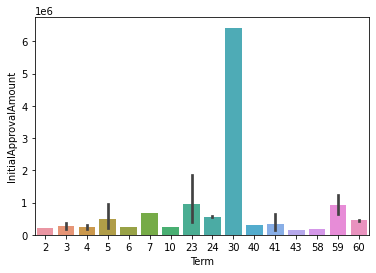

In [10]:
sns.barplot(data=c,x="Term",y="InitialApprovalAmount")

**HEAT MAP**

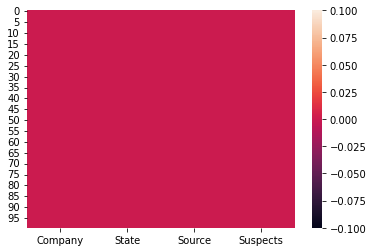

In [11]:
sns.heatmap(b.isnull())

**LINE PLOT**

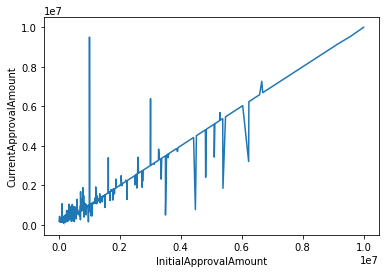

In [27]:
sns.lineplot(data=c,x="InitialApprovalAmount",y="CurrentApprovalAmount")
plt.show()

**COUNT PLOT**

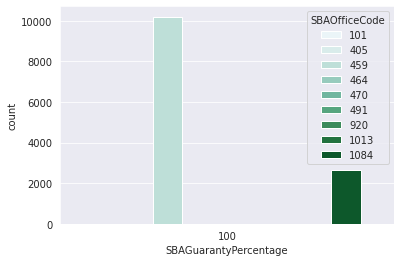

In [29]:
sns.set_style('darkgrid')
sns.countplot(x="SBAGuarantyPercentage",hue="SBAOfficeCode",data=c,palette="BuGn")

**DIST PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


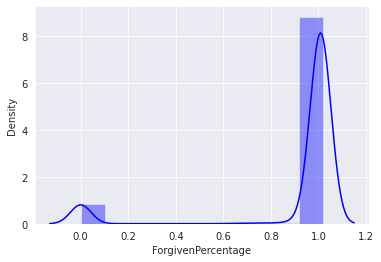

In [35]:
sns.distplot(c['ForgivenPercentage'].dropna(),color="blue",bins=10)

**BOX PLOT**

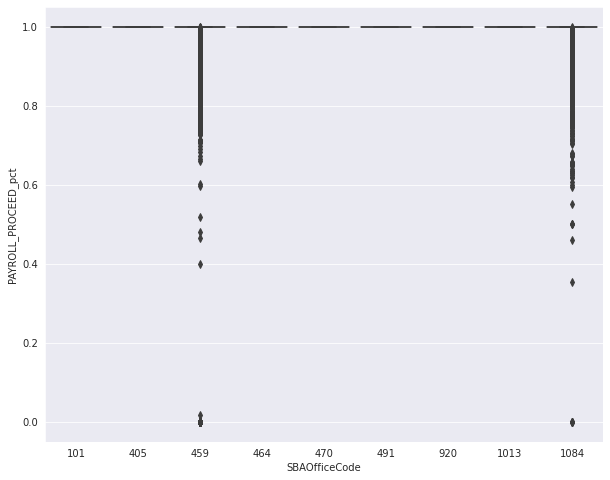

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x="SBAOfficeCode",y="PAYROLL_PROCEED_pct",data=c)

**SCATTER PLOT**

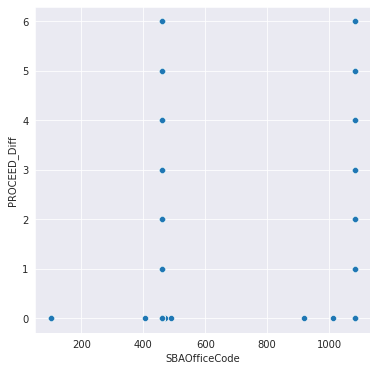

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="SBAOfficeCode",y="PROCEED_Diff",data=c)